# COMP0142

# Assignment: Polynomial Regression, Regularization and Logistic Regression

## Introduction

In this assignment you will implement Polynomial Regression, Regularization and Logistic Regression using the library Scikit-learn.

In Part A of the assignment we will focus on Polynomial regression with and without regularization. First, we will load the train and test dataset and we will fit a simple polynomial of order 2 to see how to combine the classes `PolynomialFeatures` and `LinearRegression`. Then we will fit polynomials of different orders to the training data and we will compute the Mean Squared Error (MSE) of the train and test datasets. We will plot the MSE values to find out which polynomial order fits the data better. Afterwards we will select a specific polynomial degree and we will observe and analyse the impact of regularisation.

In Part B of the assignment we will apply a LASSO Regression model to the `mtcars.csv` dataset. We will observe how increasing the hyperparameter pushes the weight coefficients to zero more aggressively than in the case of Ridge Regression.

In Part C of this assignment, we are going to implement Logistic Regression. First, we are going to examine how data scaling affects the performance of the classifier: We will produce a classification report and plot a confusion matrix. We are then going to use cross validation to more reliably compare the performance of the models.

We are going to work with a synthetic dataset and then the following two datasets:
- The 'mtcars' dataset
- The 'Gene expression cancer RNA-Seq' dataset

## Guidelines

- The structure of the code is given to you and you will need to fill in the parts corresponding to each question.
- You will have to submit the completed notebook in the Jupyter notebook format: `.ipynb`.
- Do not modify/erase other parts of the code if you have not been given specific instructions to do so.
- When you are asked to insert code, do so between the areas which begin:
  
  `##########################################################`
  
  `# TO_DO`
  
  `# [your code here]`
   
   And which end:
   
  `# /TO_DO
   ##########################################################`


- When you are asked to comment on the results you should give clear and comprehensible explanations. Write the comments in a 'Code Cell' with a sign `#` at the beginning of each row, and in the areas which begin:

  `# [INSERT YOUR ANSWER HERE]`

## Imports

Please do not change the cell below, you will see a number of imports. All these packages are relevant for the assignment and it is important that you get used to them. You can find more information about them in the respective documentations. The most relevant for this assignment is Scikit-learn:

https://scikit-learn.org/stable/

In [ ]:
# PLEASE DO NOT CHANGE THIS CELL

import pandas as pd
import numpy as np

# Standard python libraries for data and visualisation
import matplotlib.pyplot as plt

import pylab
%matplotlib inline
import seaborn as sns

# SciKit Learn a python ML Library
# Import models
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LogisticRegression

# Import error metric
from sklearn.metrics import mean_squared_error

# Import data munging tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

# Import error metric
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load files
import pickle

# Import library for handling warnings
import warnings

# Part A: Polynomial Regression [80 marks]

In the lectures, we introduced a 1-dimensional input dataset, that gave rise to the following set of $n$ output,input pairs:

$$ \mathcal{S} =\{ (x^{(i)}, y^{(i)}) \}^{n}_{i=1}$$

We want to fit a polynomial of degree $k$ to form the following prediction function:

$$ f_k(x) =  w_0 + w_1 x + w_2 x^2 + \ldots + w_k x^k $$

We can transform this problem to a linear regression problem by transforming the input data:

$$\mathbf{X} = \left[\begin{array}{cccc}
1 & x^{(1)} & (x^{(1)})^2 & \dots & (x^{(1)})^k \\
1 & x^{(2)} & (x^{(2)})^2 & \dots & (x^{(2)})^k \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x^{(n)} & (x^{(n)})^2 & \dots & (x^{(n)})^k \\
\end{array}\right],
\mathbf{y} = \left[\begin{array}{c}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(n)}
\end{array}\right],
\mathbf{w} = \left[\begin{array}{c}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_k
\end{array}\right]
$$

`PolynomialFeatures` transforms the 1-dimensional array $[x^{(1)},...,x^{(n)}]^T$ into the matrix $\mathbf{X}$. Now, we can use the `LinearRegression` class to fit the data as we did during the regression class.

The loss function that the model is minimising is:

\begin{equation}
\mathsf{L}(\mathcal{E},\mathcal{S}, \mathbf{w}) = \Vert\mathbf{y}- \mathbf{Xw}\Vert^2_2
\end{equation}

We begin by loading the data and plotting it:

In [ ]:
# PLEASE DO NOT CHANGE THIS CELL
# Load Data

with open('data_pol_fit.pkl', 'rb') as handle:
    data = pickle.load(handle)

X = data['X']
y = data['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

X_grid = np.linspace(-2,2,num=100)[:,np.newaxis]

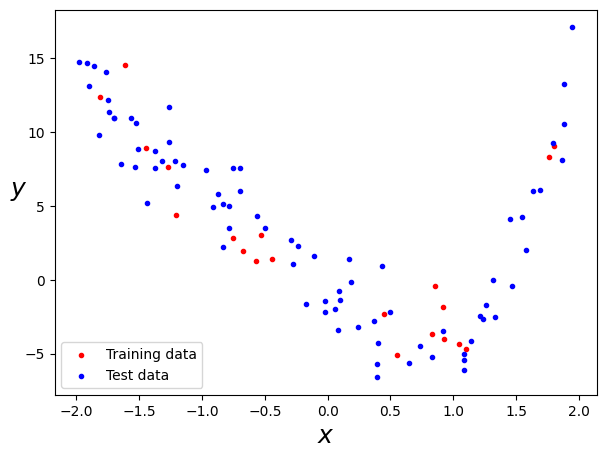

In [ ]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x_train, y_train, c='r', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='b', marker='.', label="Test data")
ax.legend()
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

We fit a polynomial of order 2 to the training dataset and we plot the results:

In [ ]:
# PLEASE DO NOT CHANGE THIS CELL

poly_features = PolynomialFeatures(degree=2)

x_train_poly = poly_features.fit_transform(x_train)
X_grid_poly = poly_features.fit_transform(X_grid)

lin_reg = LinearRegression()
lin_reg.fit(x_train_poly, y_train)

y_grid_pred = lin_reg.predict(X_grid_poly)

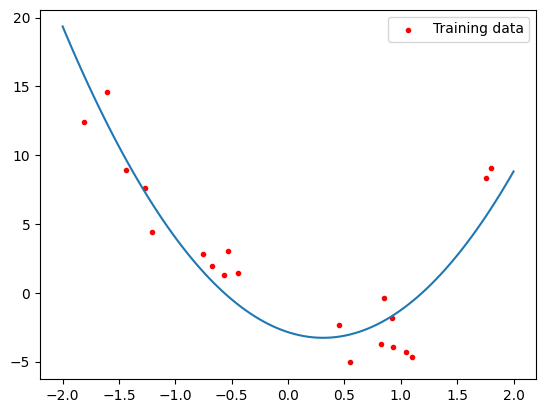

In [ ]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots()
ax.scatter(x_train, y_train, c='r', marker='.', label="Training data")
ax.legend()
plt.plot(X_grid, y_grid_pred)
plt.show()

### _Question 1 [20 marks]_

Using the same approach fit 0-th to 10-th order polynomials to the training data.
For each polynomial order you should:

- Create a Polynomial features instance (call it poly_features) and transform your training and test datasets
- Create a Linear regression model (call it lin_reg) and fit it with the train set
- Compute the predictions of the model for the train and test set
- Compute the Mean Square Error for the train and test set (think about using the `mean_squared_error` function for Scikit-learn) and append the values to mses_train and mses_test



In [ ]:
########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

y_preds = []
mses_train = []
mses_test = []
max_degree = 10
for degree in range(max_degree+1):
#
########################################################

########################################################
# TO_DO
#[your code here]
    poly_features = PolynomialFeatures(degree=degree)

    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.fit_transform(x_test)

    lin_reg = LinearRegression()
    lin_reg.fit(x_train_poly, y_train)

    y_train_pred = lin_reg.predict(x_train_poly)
    y_test_pred = lin_reg.predict(x_test_poly)

    mses_train.append(mean_squared_error(y_train, y_train_pred))
    mses_test.append(mean_squared_error(y_test, y_test_pred))



# /TO_DO
########################################################

########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

    X_grid_poly = poly_features.fit_transform(X_grid)
    y_grid_pred = lin_reg.predict(X_grid_poly)
    y_preds.append(y_grid_pred)
#
########################################################

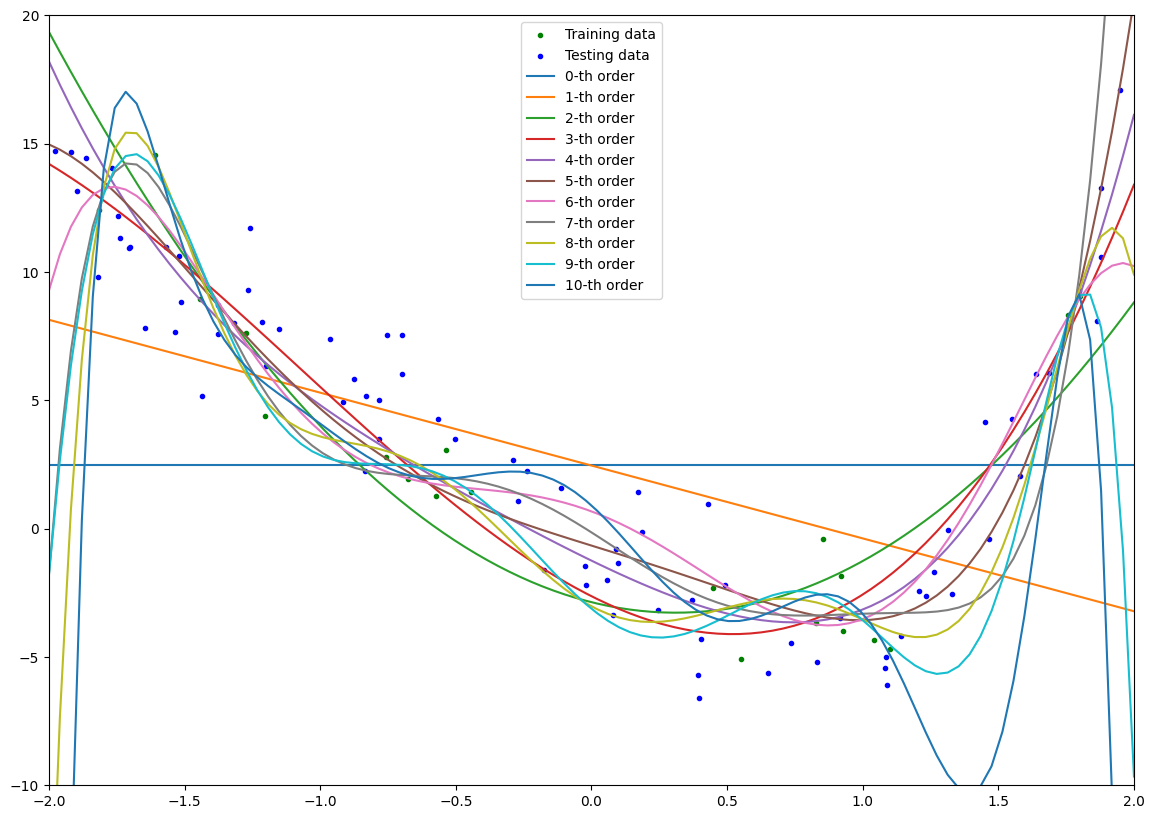

In [ ]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(x_train, y_train, c='g', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='b', marker='.', label="Testing data")

for degree in range(0,max_degree+1):
    ax.plot(X_grid, y_preds[degree], label="{}-th order".format(degree))

ax.axis([-2, 2, -10, 20])
ax.legend()
plt.show()

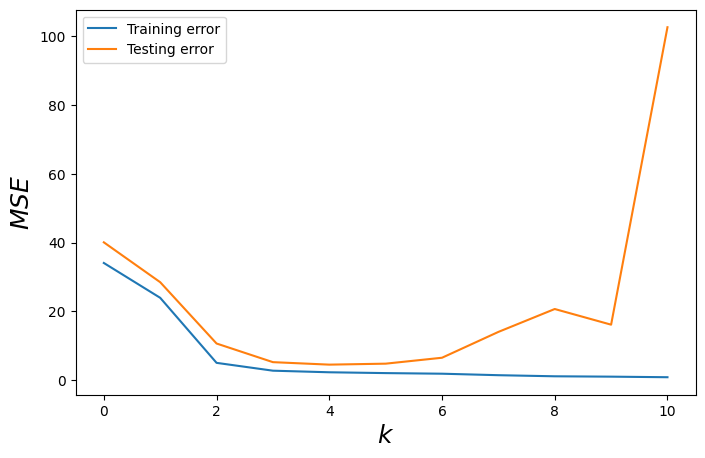

In [ ]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(mses_train, label="Training error")
ax.plot(mses_test, label="Testing error")
plt.xlabel("$k$", fontsize=18)
plt.ylabel("$MSE$",fontsize=18)
ax.legend()
#ax.axis([0, 10, 0, 40])
plt.show()

### _Question 2 [20 marks]_
What is your interpretation of the mean squared error plot? What is happening between $k = 0$ and $k = 10$? Which polynomial order you think fits better the data?

In [ ]:
# [INSERT YOUR ANSWER HERE]
'''
For low polynomial orders (k = 0 to k around 3):
-> Both training and testing errors decrease as k increases.
-> This suggests that a low-degree polynomial is too simple (underfitting), failing to capture the complexity of the data.
-> Increasing k allows the model to better fit the data, improving generalization.
For moderate polynomial orders (k ~ 3  to  k ~ 5):
-> Training error reaches a very low level, almost plateauing.
-> Testing error is also at its lowest, suggesting that the model is well-generalized and balanced between underfitting and overfitting.
-> This region represents the optimal polynomial order for the given data.
For high polynomial orders (k > 6):
-> Training error remains low (model fits training data very well).
-> Testing error starts increasing, which indicates overfitting.
-> At  k = 10, the test error spikes dramatically, meaning the model is too complex, capturing noise rather than meaningful patterns.

Thus, the best-fitting polynomial order is a moderate value, between 3 and 5
'''

### Regularization

In this section, we will analyse the impact of regularization in the model fitting.

We will implement Polynomial Ridge Regression so the loss function is:

\begin{equation}
\mathsf{L}(\mathcal{E},\mathcal{S},\mathbf{w}) = \Vert\mathbf{y}- \mathbf{Xw}\Vert^2_2 + \lambda \Vert\mathbf{w}\Vert^2_2
\end{equation}

where $\lambda$ is the regularization parameter.

To observer the impact of regularization we will specify that the polynomial order is 6 (we could have chosen any another order) and we will fit the polynomial regression with different $\lambda$ values.

We will use the `Ridge` Scikit-learn class. You can find information and examples of how to use it in:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

### _Question 3 [20 marks]_

Fit a 6-th order polynomial to the training data.

For each $\lambda$-value you should:

- Create a Ridge regression model `Ridge` (call it ridge_reg) with the lambda_value and fit it to the train set
- Compute the predictions of the model for the train and test set
- Compute the Mean Square Error for the train and test set (think about using the `mean_squared_error` function for Scikit-learn) and append the values to mses_train and mses_test


In [ ]:
# PLEASE DO NOT CHANGE THIS CELL

lambda_list = np.logspace(-3.0, 2.0, num=20)
print(lambda_list)

[1.00000000e-03 1.83298071e-03 3.35981829e-03 6.15848211e-03
 1.12883789e-02 2.06913808e-02 3.79269019e-02 6.95192796e-02
 1.27427499e-01 2.33572147e-01 4.28133240e-01 7.84759970e-01
 1.43844989e+00 2.63665090e+00 4.83293024e+00 8.85866790e+00
 1.62377674e+01 2.97635144e+01 5.45559478e+01 1.00000000e+02]


In [ ]:
########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

y_preds = []
mses_train = []
mses_test = []

poly_features = PolynomialFeatures(degree=6)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)
X_grid_poly = poly_features.fit_transform(X_grid)

for lambda_value in lambda_list:
#
#########################################################

#########################################################
# TO_DO
#[your code here]
    ridge_reg = Ridge(alpha=lambda_value)
    ridge_reg.fit(x_train_poly, y_train)

    y_train_pred = ridge_reg.predict(x_train_poly)
    y_test_pred = ridge_reg.predict(x_test_poly)

    mses_train.append(mean_squared_error(y_train, y_train_pred))
    mses_test.append(mean_squared_error(y_test, y_test_pred))

# /TO_DO
#########################################################

#########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

    y_grid_pred = ridge_reg.predict(X_grid_poly)
    y_preds.append(y_grid_pred)
#
#########################################################

We plot the MSE of the train and test set for each lamba_value:

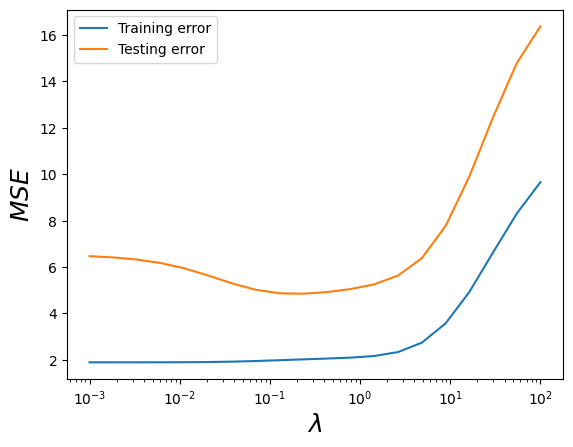

In [ ]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots()
ax.plot(lambda_list,mses_train, label="Training error")
ax.plot(lambda_list,mses_test, label="Testing error")
ax.legend()
plt.xlabel("$\lambda$", fontsize=18)
plt.ylabel("$MSE$",fontsize=18)
ax.set_xscale('log')
plt.show()

In [ ]:
# PLEASE DO NOT CHANGE THIS CELL

lambda_argmin = np.argmin(mses_test)
lambda_opt  = lambda_list[lambda_argmin]
print(lambda_opt)

0.23357214690901212


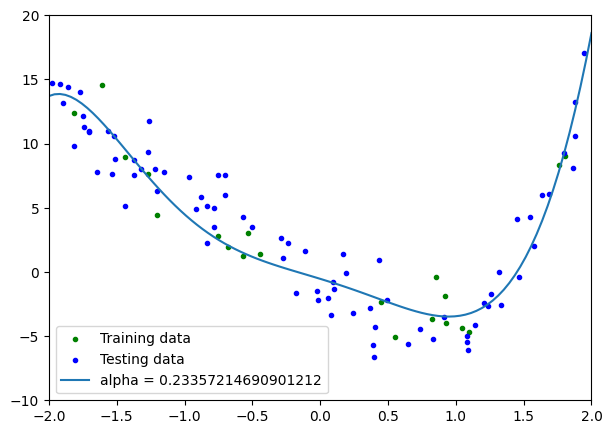

In [ ]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x_train, y_train, c='g', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='b', marker='.', label="Testing data")

ax.plot(X_grid, y_preds[lambda_argmin], label="alpha = {}".format(lambda_opt))

ax.axis([-2, 2, -10, 20])
ax.legend()
plt.show()

### _Question 4 [20 marks]_
What is your interpretation of the mean squared error plot? What happens when $\lambda$ increases? Is the regularization working?

In [ ]:
# [INSERT YOUR ANSWER HERE]
'''
When lambda is very low (less than 10^-3):
-> The training error is very low, suggesting that the model is fitting the training data extremely well.
-> The testing error is relatively high, indicating that the model is overfitting the training data (i.e., it performs well on training data but poorly on unseen data).
-> This behavior suggests that the model is too complex, capturing noise rather than general patterns.
There is an optimal point where testing MSE is minimized - seen to be around 10^0. At this point:
-> Both training and testing errors are at their lowest, indicating that the model has found a good balance between underfitting and overfitting.
-> This is the optimal regularization strength, where the model generalizes well to unseen data while still capturing meaningful relationships.
Past that optimal lambda point:
-> The model starts underfitting. MSE for both training and testing rises.
-> This suggests that the model is underfitting because the Ridge penalty forces the coefficients to be very small, limiting the model’s ability to learn from the data.
-> At extremely high lambda, the model is too constrained and cannot capture important relationships in the data.

Ridge regularization is clearly working.
It balances the model's flexibility by preventing extreme overfitting and it leads to a lower test MSE than the unregularized version.
We can see this by comparing the MSE results for test data on the 6th degree polynomial in the previous unregularized graph and the current one.
The optimal lambda point we see on the graph, as aforementioned, shows that regularization is improving the generalization ability of the model.

Ridge regularization successfully reduces overfitting and improves generalization by preventing the model from having excessively large coefficients.
The best lambda value is found where the test error is minimized, which is around the middle of the graph (around 10^0).
Choosing this value ensures a well-regularized model that neither overfits nor underfits.
 '''

# Part B: LASSO Regression [20 marks]

In this part of the Assignment, we will analyse the impact of $l1$-regularization in linear regression. We will apply LASSO Regression, so now the loss function is:

\begin{equation}
\tilde L(\mathcal{E},\mathcal{S},w) = ||\mathbf{y}- \mathbf{Xw}||^2_2 + \lambda ||\mathbf{w}||_1
\end{equation}

where $\lambda$ is the regularization parameter.

We will observe how this method shrinks some weights more aggressively to zero by using a range of different $\lambda$ values.

We will use the `Lasso` Scikit-learn class. You can find information and examples of how to use it in:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

First, we load the `mtcars.csv` file that contains data about car characteristics.
It contains 11 car attributes and we will use Miles per gallon (mpg) as our target value.

1. 	cyl:	Number of cylinders
2. 	disp:   Displacement (cu.in.)
3. 	hp:	    Gross horsepower
4. 	drat:	Rear axle ratio
5. 	wt: 	Weight (1000 lbs)
6. 	qsec: 	1/4 mile time
7. 	vs: 	Engine (0 = V-shaped, 1 = straight)
8. 	am: 	Transmission (0 = automatic, 1 = manual)
9. 	gear: 	Number of forward gears
10. carb: 	Number of carburetors
11. mpg: 	Miles/(US) gallon

In [ ]:
# PLEASE DO NOT CHANGE THIS CELL

data = pd.read_csv('mtcars.csv', index_col = 0)
data.head()

,brand,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg
0,Mazda RX4,6,160.0,110,3.90,2.620,16.46,0,1,4,4,21.0
1,Mazda RX4 Wag,6,160.0,110,3.90,2.875,17.02,0,1,4,4,21.0
2,Datsun 710,4,108.0,93,3.85,2.320,18.61,1,1,4,1,22.8
3,Hornet 4 Drive,6,258.0,110,3.08,3.215,19.44,1,0,3,1,21.4
4,Hornet Sportabout,8,360.0,175,3.15,3.440,17.02,0,0,3,2,18.7


In [ ]:
# PLEASE DO NOT CHANGE THIS CELL

X = data.iloc[:,1:-1]
y = data.iloc[:,-1]
X_colLabels = X.columns[:]

X = preprocessing.scale(X)
y = preprocessing.scale(y)

### _Question 5 [10 marks]_

Now, do the following:

- Apply a Ridge and a LASSO regression to the dataset `X` with target values `y` for each lambda value and append the weights/coefficients of each model in the lists `weights_ridge` and `weights_lasso`(check the `.coef_` method for the `Ridge` and `Lasso` class).

In [ ]:
########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

lambda_list = np.logspace(-5.0, 5, num=100)

weights_ridge = []
weights_lasso = []

for lambda_value in lambda_list:

#
#######################################################

    #######################################################
    # TO_DO
    ridge_reg = Ridge(alpha=lambda_value)
    ridge_reg.fit(X, y)

    lasso_reg = Lasso(alpha=lambda_value)
    lasso_reg.fit(X, y)

    weights_ridge.append(ridge_reg.coef_)
    weights_lasso.append(lasso_reg.coef_)


    # /TO_DO
    ##########################################################

Here we can see how the weights are pushed to zero more aggresively for the LASSO regression in comparison to the Ridge regression:

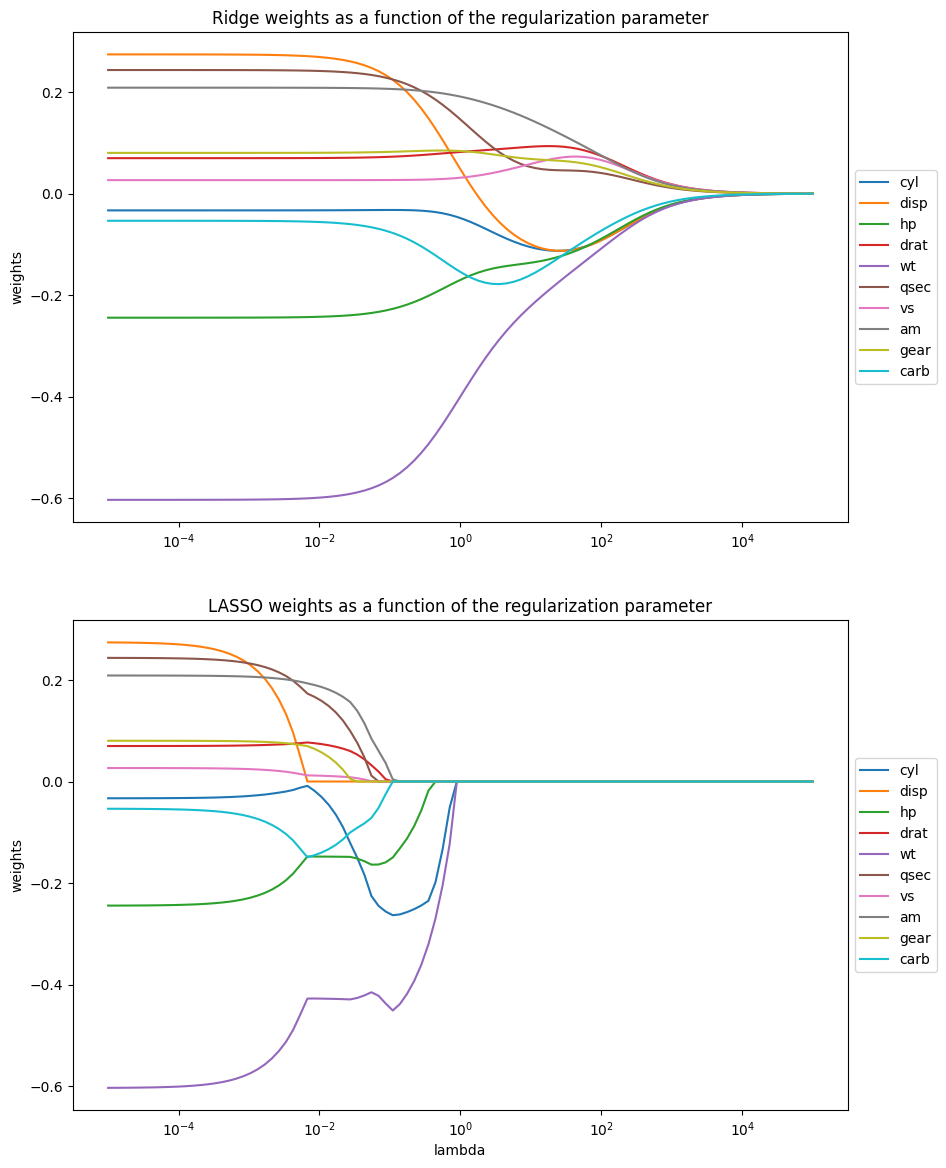

In [ ]:
# PLEASE DO NOT CHANGE THIS CELL

fig = plt.figure(figsize = (10,14))
ax = fig.add_subplot(211)
ax.plot(lambda_list, weights_ridge)
ax.set_xscale('log')
ax.legend(labels = X_colLabels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('weights')
plt.title('Ridge weights as a function of the regularization parameter')

ax = fig.add_subplot(212)
ax.plot(lambda_list, weights_lasso)
ax.set_xscale('log')
ax.legend(labels = X_colLabels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('LASSO weights as a function of the regularization parameter')
plt.show()

### _Question 6 [10 marks]_

Finally, do the following:

- Compute in which order the attributes weights go to zero when we increase the lambda value using `weights_lasso` and `X_colLabels`.

In [ ]:
########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

weights_ordering = []

#
#######################################################

#######################################################
# TO_DO
#[your code here]

num_features = len(X_colLabels)

for i in range(num_features):
    zero_ids = None

    for j, lambda_val in enumerate(lambda_list):
        if abs(weights_lasso[j][i]) < 1e-8: #close enought to zero because floating point precision
            zero_ids = j
            break

    # For feature coefficients that never reach zero
    if zero_ids is None:
        zero_ids = len(lambda_list)

    weights_ordering.append((X_colLabels[i], zero_ids))

# Sort by lambda index for first zero coefficient
weights_ordering.sort(key=lambda x: x[1])

weights_ordering = [item[0] for item in weights_ordering]

# /TO_DO
##########################################################

########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

print(weights_ordering)

#
##################

['disp', 'gear', 'qsec', 'vs', 'drat', 'carb', 'am', 'hp', 'cyl', 'wt']


# Part C: Logistic Regression [50 marks]

## Gene expression dataset
This dataset contains gene expression data from patients diagnosed with one of tumor types: BRCA, KIRC, COAD, LUAD and PRAD. Each feature corresponds to a different gene.

Dataset location: https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

Number of instances: 801

Number of features: 20531   

All of these parameters are real-valued continuous. To reduce computation time, we are going to work with the first 200 features.

## Load dataset
Please save the `data.csv` and `labels.csv` files included in the assignment zip file, which contain this data, and change the paths below to the paths leading to the location of your downloaded files. You may want to use os.chdir to change directory.

In [ ]:

file_path_data = "data.csv"
file_path_labels = "labels.csv"

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL

# read the file with pandas.read_csv
X = pd.read_csv(file_path_data, usecols=[*range(1, 201)])
y = pd.read_csv(file_path_labels, usecols=[1]).values.ravel()

label_list = ["BRCA", "KIRC", "COAD", "LUAD", "PRAD"]

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL

# Functions to use
# Decision boundary plotting
def plot_predictions(X, y, clf):
    h = .02  # step size in the mesh

    # create a mesh to plot in
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.figure(figsize=(8,6))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    pylab.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel(list(X.head(0))[0])
    plt.ylabel(list(X.head(0))[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(np.arange(min(X.iloc[:, 0]), max(X.iloc[:, 0])+1, 1.0))
    plt.yticks(np.arange(min(X.iloc[:, 1]), max(X.iloc[:, 1])+1, 1.0))
    plt.title(clf)

    plt.show

# confusion matrix plotting
def plot_conf_matrix(conf_matrix):
    plt.figure(figsize=(5,5))
    sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');

## Data analysis and pre-processing
Below, we will generate histograms of the first 12 'Gene expression cancer RNA-Seq' dataset features.

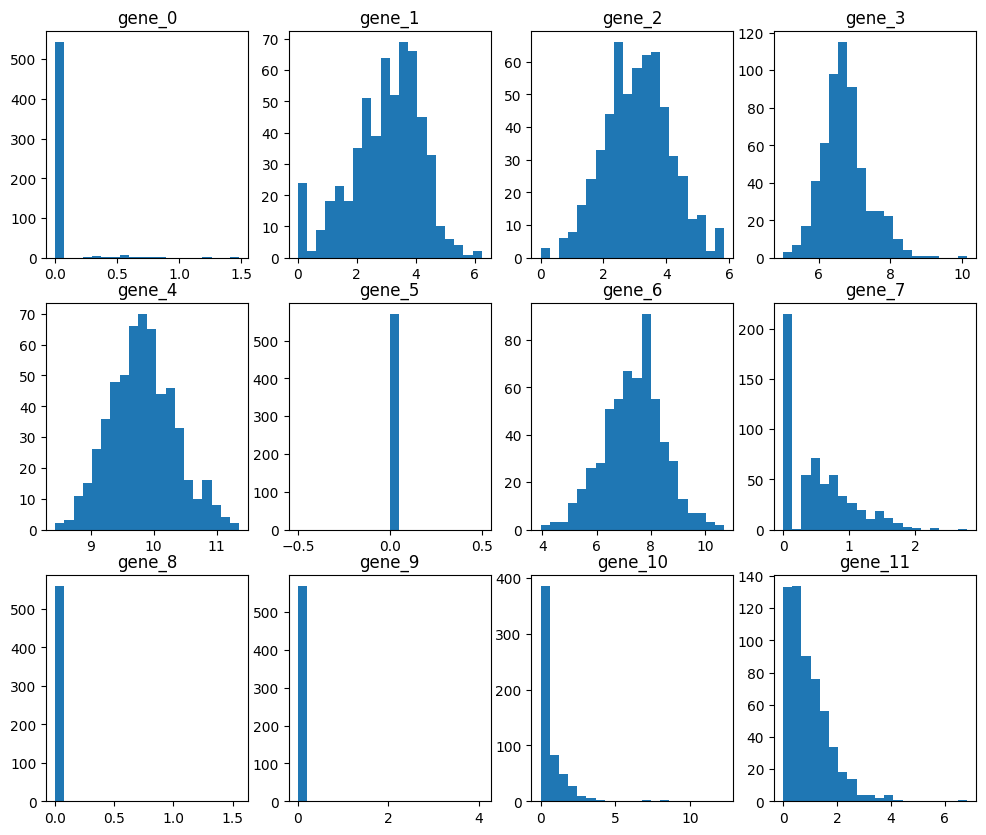

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL

figs, axs = plt.subplots(3, 4, figsize=(12, 10))
axs = axs.ravel()

for counter in range(12):
    col = X.columns[counter]
    axs[counter].hist(X[col], bins=20)
    axs[counter].set_title(col)

Regularisation makes the classifier dependent on the scale of the features.

We are going to scale the features and compare the performance of Logistic Regression on unscaled and scaled dataset.

### _Question 7 [10 marks]_

### _a) [3 marks]_
- Use `StandardScaler()` to scale the data. Save the result to a new variable (do not overwrite X).

In [ ]:
#######################################################
# TO_DO
#[your code here]

scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

#/TO_DO
#######################################################

### _b) [3 marks]_
-  Explain how the `StandardScaler()` function changes the data, (in particular its mean and variance)? (**Hint:** You can re-run the code from the section **Data analysis and pre-processing** in order to visualise scaled values.)

In [ ]:
# [INSERT YOUR ANSWER HERE]
'''
StandardScaler() centers the data around zero mean and scales it to unit variance.
Given a dataset with features X, each feature (column) is transformed using the formula:
-> X (scaled) = (X - mean)/variance
It transforms each feature in the data such that the scaled feature has:
-> mean = 0
-> variance = 1
'''

### _c) [4 marks]_
- `LogisticRegression()` uses $\ell_2$ regularisation as default. Briefly explain the effect of such a regulariser. Furthermore, briefly explain why data scaling might be a useful pre-processing step before the application of such a regulariser.

In [ ]:
# [INSERT YOUR ANSWER HERE]
'''
l2 regularization penalizes large coefficients in the regression model by reducing the sum of the squared coefficients, shrinking them but not forcing them exactly to zero.
This helps reduce overfitting and encourages simpler, more generalizable models.
Since regularization penalizes large coefficients, it is crucial that all features have similar scales. Otherwise:
-> Features with large magnitudes will dominate the penalty and be disproportionately shrunk, leading to distorted results.
-> Unscaled data can cause the optimizer to struggle, leading to slow convergence or suboptimal solutions.
'''

### Classifier performance analysis

A Confusion Matrix is a table used for the evaluation of classification models. The x axis represents predicted labels while the y axis represents actual labels. Each cell indicates the sum of instances assigned to a particular combination of these labels. Diagonal values represents correctly classified instances.  

### _Question 8 [20 marks]_

### _a) [5 marks]_
- Create training and testing datasets for the unscaled and scaled data (set `random_state=42` and `train_size=0.7` when making your split).

In [ ]:
lg = LogisticRegression(solver = "lbfgs", multi_class = "multinomial", max_iter = 5000)
lg_scaled = LogisticRegression(solver = "lbfgs", multi_class = "multinomial", max_iter = 5000)

#######################################################
# TO_DO
#[your code here]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

X_train_scaled = X_scaled.loc[X_train.index, :]
X_test_scaled  = X_scaled.loc[X_test.index, :]

# Unscaled train set: (X_train, y_train)
# Unscaled test set: (X_test, y_test)
# Scaled train set: (X_train_scaled, y_train)
# Scaled test set: (X_test_scaled, y_test)


#/TO_DO
#######################################################

ValueError: Found input variables with inconsistent numbers of samples: [571, 801]

### _b) [5 marks]_
- Fit `LogisticRegression()` to the unscaled and scaled data.

In [ ]:
with warnings.catch_warnings():

    ########################################################
    # TO_DO

    # NB: you may wish to comment out this filter
    warnings.simplefilter("ignore")

    #[your code here]
    # fit unscaled data
    lg.fit(X_train, y_train)

    # Fit scaled data
    lg_scaled.fit(X_train_scaled, y_train)

    #/TO_DO
    #######################################################

### _c) [5 marks]_
- Plot confusion matrices for the scaled and unscaled data using Scikit-learn `confusion_matrix()` and the `plot_conf_matrix()` function defined for you at the beginning of the notebook.

In [ ]:
#######################################################
# TO_DO
#[your code here]
y_pred_unscaled = lg.predict(X_test)

# Confusion matrix for unscaled calculation
confusion_matrix_unscaled = confusion_matrix(y_test, y_pred_unscaled)

# Plot unscaled
plot_conf_matrix(confusion_matrix_unscaled)
plt.title("Confusion Matrix (Unscaled)")
plt.show()

y_pred_scaled = lg_scaled.predict(X_test_scaled)
# Confusion matrix for scaled calculation
confusion_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)

# Plot scaled
plot_conf_matrix(confusion_matrix_scaled)
plt.title("Confusion Matrix (Scaled)")
plt.show()

#/TO_DO
#######################################################

### _d) [5 marks]_
- Print a classification report using scikit-learn `classification_report()` function. You can use `target_names = label_list` to include labels.

In [ ]:
with warnings.catch_warnings():

    ########################################################
    # TO_DO

    # Classification report for unscaled model
    print("Classification Report (Unscaled Data)\n")
    print(classification_report(y_test, y_pred_unscaled, target_names=label_list))

    # Classification report for scaled model
    print("\nClassification Report (Scaled Data)\n")
    print(classification_report(y_test, y_pred_scaled, target_names=label_list))

    #/TO_DO
    #######################################################

### Cross validation
In Scikit-learn, `StratifiedKFold()` splits the data into $k$ different folds.  
`cross_val_score()` then uses these folds to run the classifier multiple times and collect multiple accuracy scores.   

### _Question 9 [20 marks]_

### _a) [5 marks]_
- Split data using `StratifiedKFold()`. Set `n_splits = 10`, `shuffle = True`, and `random_state=42`.

In [ ]:
with warnings.catch_warnings():

    ########################################################
    # TO_DO

    # NB: you may wish to comment out this filter
    warnings.simplefilter("ignore")

    #[your code here]
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


    #/TO_DO
    ########################################################

### _b) [5 marks]_
- Calculate cross validation scores using `cross_val_score()`. Call the variables storing these scores `lg_scores` and `lg_scaled_scores` (for consistency with plotting done for you in the subsequent section). (**Hint:** `cv` is equal to the output of `StratifiedKFold()`.)

In [ ]:
with warnings.catch_warnings():

    ########################################################
    # TO_DO

    # NB: you may wish to comment out this filter
    warnings.simplefilter("ignore")

    #[your code here]
    lg_scores = cross_val_score(lg, X, y, cv=skf)
    lg_scaled_scores = cross_val_score(lg_scaled, X_scaled, y, cv=skf)


    #/TO_DO
    ########################################################

### _c) [5 marks]_
- Calculate and print the mean of the scores.

In [ ]:
with warnings.catch_warnings():

    ########################################################
    # TO_DO

    # NB: you may wish to comment out this filter
    warnings.simplefilter("ignore")

    #[your code here]
    print("Mean cross-validation score (Unscaled):", lg_scores.mean())
    print("Mean cross-validation score (Scaled):", lg_scaled_scores.mean())

    #/TO_DO
    ########################################################

### _d) [5 marks]_
- Unlike vanilla `KFold()`, `StratifiedKFold()` aims to preserve the proportion of examples belonging to each class in each split. Does `StratifiedKFold()` make each data split balanced if the whole dataset is not balanced?

In [ ]:
# [INSERT YOUR ANSWER HERE]

'''
StratifiedKFold() does not balance an imbalanced dataset, but it ensures that each fold maintains the same class proportions as the original dataset.
This helps prevent skewed splits and improves the reliability of model evaluation, especially in classification tasks.
While it doesn’t make the data balanced, it ensures that class distribution is consistent across all folds, which is important when working with imbalanced classes.
For actual balancing, techniques like oversampling or undersampling are needed.
'''

We can visualise the scores using a box plot. It highlights the lower and upper quartiles, and "whiskers" showing the extent of the scores.  

In [ ]:
#PLEASE DO NOT CHANGE THIS CELL

plt.figure(figsize=(8, 4))
plt.plot([1]*10, lg_scores, ".")
plt.plot([2]*10, lg_scaled_scores, ".")
plt.boxplot([lg_scores, lg_scaled_scores], labels=("logistic regression","logistic regression w/ scaling"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()